In [4]:
import numpy as np
import activation_functions as act_funs
import matplotlib.pyplot as plt

In [222]:

class Single_Layer_Perceptron():
    
    def __init__(self, X, T, bias = True):
        self.N = X.shape[1]
        self.bias = bias
        self.output_dim = T.shape[0]
        if bias == True:
            self.D = X.shape[0] + 1
            self.X = self.X_add_bias(X)
        else:
            self.D = X.shape[0]
            self.X = X
        self.T = T
        self.eta = 0.001
        self.errors = []
        self.epochs = 100
        self.W_init = self.init_W() # Store initial W
        self.W_train = self.W_init
        self.converge_epoch = np.inf
    
    def X_add_bias(self, X):
        X_bias = np.ones([self.D, self.N])
        X_bias[:-1,:] = np.copy(X)
        return X_bias
    
    def init_W(self):
        return np.random.rand(self.output_dim, self.D)
    
    def indicator(self,W,x):
        if np.matmul(W,x) >= 0:
            return 1
        else:
            return 0
    
    def seq_learn(self):
        se = 0
        for i in range(self.N):
            delta_W = 0
            x = self.X[:,i].reshape(self.D, 1)
            y = self.indicator(self.W_train, x)
            t = self.T[:,i]
            if t == 0 and y == 1:
                delta_W = -self.eta*x.T
            if t == 1 and y == 0:
                delta_W = self.eta*x.T
            self.W_train = np.add(self.W_train, delta_W)
            se += (y-t)**2
        mse = np.mean(se)
        self.errors.append(mse)
    
    def batch_learn(self):
        se = 0
        delta_W = 0
        for i in range(self.N):
            x = self.X[:,i].reshape(self.D, 1)
            y = self.indicator(self.W_train, x)
            t = self.T[:,i]
            if t == 0 and y == 1:
                delta_W += -self.eta*x.T
            if t == 1 and y == 0:
                delta_W += self.eta*x.T
            se += (y-t)**2
        mse = np.mean(se)
        self.W_train = np.add(self.W_train, delta_W)
        self.errors.append(mse)
    
    def train(self, learn_type = 'batch'):
        for e in range(self.epochs):
            if learn_type == 'batch':
                self.batch_learn()
            elif learn_type == 'seq':
                self.seq_learn()
            else:
                print("Unknown learning type")
    
    def plot_errors(self):
        plt.plot(self.errors)
        print("Obtained error", self.errors[-1:][0])

In [223]:
def w_line_vec(W, x_start, x_end, bias):
    w_line = np.zeros(2)
    k = W[:,1][0]/W[:,0][0]
    if bias == True:
        m = W[:,2]
    else:
        m = 0
    w_line[0] = k*x_start + m
    w_line[1] = k*x_end + m
    
    return w_line

def norm_vec(w_line):
    normal = np.zeros(w_line.shape)
    normal[0] = w_line[0]
    normal[1] = -1/w_line[1]
    return normal

def plot_decision_boundary(classA, classB, W, bias):
    plt.plot(classA[:,0], classA[:,1], 'bo', color = 'b')
    plt.plot(classB[:,0], classB[:,1], 'bo', color = 'r')
    #plt.plot(w_line_vec(W, 0, 1, bias))
    #plt.plot(norm_vec(w_line_vec(W, 0, 1, bias)))
    plt.plot((0, W[:,0]), (W[:,2], W[:,1]))

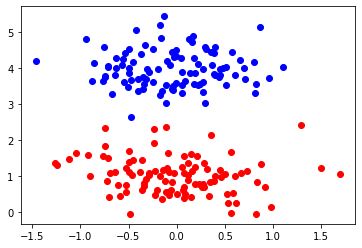

In [224]:
n = 100
mA = np.array([0, 4])
mB = np.array([0, 1])
sigmaA = 0.5
sigmaB = 0.5
classA = np.zeros([n,2])
classB = np.zeros([n,2])
classA[:,0] = np.random.normal(mA[0], sigmaA, n)
classA[:,1] = np.random.normal(mA[1], sigmaA, n)
classB[:,0] = np.random.normal(mB[0], sigmaB, n)
classB[:,1] = np.random.normal(mB[1], sigmaB, n)

plt.plot(classA[:,0], classA[:,1], 'bo', color = 'b')
plt.plot(classB[:,0], classB[:,1], 'bo', color = 'r')

In [225]:
data = np.concatenate((classA, classB), axis=0)
labels = np.array([1]*n + [0]*n)

data_labels = np.concatenate((data, labels.reshape(n*2,1)), axis=1)
#np.random.shuffle(data_labels)

X = data_labels[:,:2].T
T = data_labels[:,2].reshape(n*2, 1).T

### Perceptron learning with bias

Obtained error 2.0


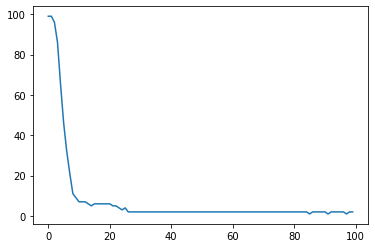

In [226]:
perceptron = Single_Layer_Perceptron(X, T)
perceptron.train('seq')
perceptron.plot_errors()

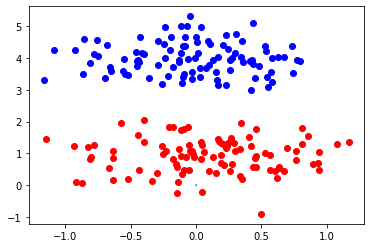

In [209]:
plot_decision_boundary(classA, classB, 
                       perceptron.W_train, perceptron.bias)

In [211]:
perceptron.W_train

array([[ 0.00036339,  0.00267913, -0.00587841]])

Obtained error 0.0


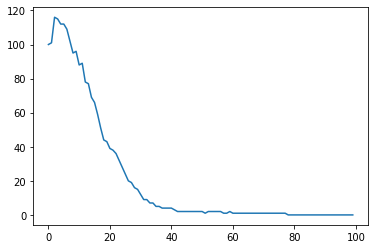

In [158]:
perceptron.W_train = perceptron.W_init
perceptron.errors = [] 
perceptron.train('batch')
perceptron.plot_errors()

In [188]:
perceptron.W_train

array([[ 0.05954853,  0.06881586, -0.17760509]])

In [192]:
perceptron.X[:,3].reshape(perceptron.D, 1)

array([[0.04897805],
       [5.04636591],
       [1.        ]])

### Perceptron learning without bias

Obtained error 10.0


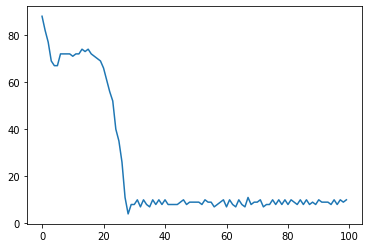

In [159]:
perceptron = Single_Layer_Perceptron(X, T, False)
perceptron.train('seq')
perceptron.plot_errors()

Obtained error 98.0


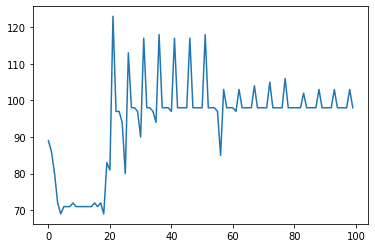

In [160]:
perceptron.W_train = perceptron.W_init
perceptron.errors = [] 
perceptron.train('batch')
perceptron.plot_errors()